In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tqdm

In [2]:
train_df = pd.read_csv('./train_label.txt.csv')
val_df = pd.read_csv('./val_label.txt.csv')
predict_df = pd.read_csv('./prediction.txt.csv')

In [5]:
train_df

,img_name,target
0,3381ccbc4df9e7778b720d53a2987014.jpg,1
1,63fee8a89581307c0b4fd05a48e0ff79.jpg,0
2,7eb4553a58ab5a05ba59b40725c903fd.jpg,0
3,920085930764461878d67b71703778e8.jpg,1
4,f6320687a93ccb0c5fa892dc3361b804.jpg,1
...,...,...
524424,1af9be6ad24447683a415f214f9baead.jpg,1
524425,fa3c2a36f6d6c669000306e2f2406dea.jpg,1
524426,d639604314f84e3d93c0c9fb49ee34da.jpg,1
524427,c477803feee068b575cf9eb6ba7a773f.jpg,1


In [4]:
train_img_root = '/mnt/e/Downloads/waitan2024_deepfake_challenge__赛道1对外发布数据集_phase1/phase1/trainset'

In [7]:
from sklearn.metrics import roc_curve, auc

In [10]:
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

# 计算 FPR, TPR 和 阈值
fpr, tpr, thresholds = roc_curve(y_true, y_scores)


In [12]:
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))

In [14]:
hs = []
ws = []
for i in tqdm.tqdm(range(len(train_df))):
    img = cv2.imread(os.path.join(train_img_root, train_df['img_name'][i]))
    h,w,c = img.shape
    hs.append(h)
    ws.append(w)

100%|██████████| 524429/524429 [10:28:47<00:00, 13.90it/s]       


(array([     0.,      0.,      0.,      0.,      0., 524429.,      0.,
             0.,      0.,      0.]),
 array([511.5, 511.6, 511.7, 511.8, 511.9, 512. , 512.1, 512.2, 512.3,
        512.4, 512.5]),
 <BarContainer object of 10 artists>)

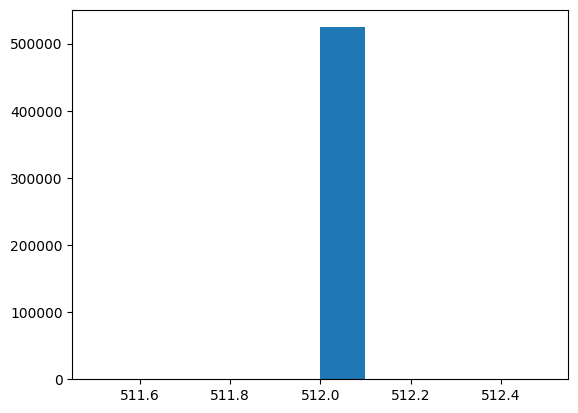

In [15]:
plt.hist(hs)

(array([     0.,      0.,      0.,      0.,      0., 524429.,      0.,
             0.,      0.,      0.]),
 array([511.5, 511.6, 511.7, 511.8, 511.9, 512. , 512.1, 512.2, 512.3,
        512.4, 512.5]),
 <BarContainer object of 10 artists>)

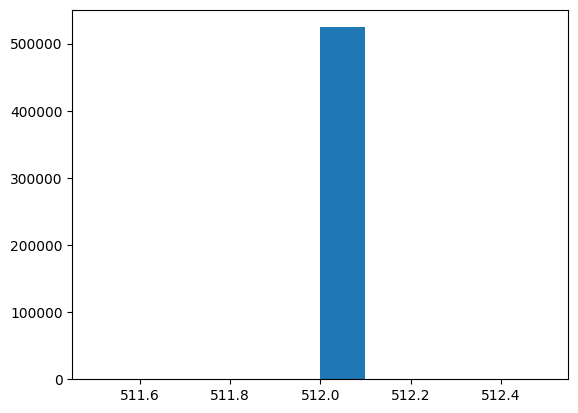

In [16]:
plt.hist(ws)

In [17]:
import torch

In [18]:
model = torch.load('./model_epoch_8.pth')

In [30]:
pre_df = pd.read_csv('predict_output.csv')

In [31]:
pre_df['y_pred'] = [torch.softmax(torch.Tensor([x, -x]), dim=0)[0].item() for x in pre_df['y_pred']]

In [33]:
pre_df.to_csv('predict_output.csv', index=False)

In [34]:
from utils import cal_tar_far

In [36]:
print(cal_tar_far(pre_df['y_pred'], val_df['target']))

False Positive Rate: [0.00000000e+00 3.04661318e-04 4.23140720e-04 ... 9.92705054e-01
 9.92738905e-01 1.00000000e+00]
True Positive Rate: [0.         0.36665874 0.3972882  ... 1.         1.         1.        ]
AUC: 0.9498932229047264
None
